# BST 267: Introduction to Social and Biological Networks (2017)
# Homework 3

In this homework, you will use Python and NetworkX to explore different network properties. Throughout this assignment, use Python and NetworkX to answer the questions and provide your solutions as a Jupyter Notebook.

Before proceeding, go to the "Cell" menu and click on "Run All". This will run through the notebook, making sure that the questions and figures show up correctly.

All questions ask you to analyze an empirical protein-protein interaction network. The vertex file is called `yeast_vertices.txt` and the edge file is called `yeast_edges.txt`; the former maps vertex IDs (numbers) to protein names, and the latter lists the edges of the network as pairs of vertex IDs. This is a relatively large network, so you may not want to visualize it. We provide a visualization of the network below.

Visualization of protein-protein interaction network in budding yeast.
<img src="yeast.png">

## Question 1
The edge list `yeast_edges.txt` specifies each edge of the network. Download all files to your working directory and then read in the edge list file using the following script.

In [44]:
#importing the networkx package, but calling it by name nx so it can be easily referred 
#to for future codes
import networkx as nx
#creating an empty graph, G
G = nx.Graph()
#reading in the file 'yeast_edges.txt' and calling it 'filename'
filename = "yeast_edges.txt"
#creating a for-loop that looks at each variable, and calls it line, in the file 
#we opened
for line in open(filename):
    #for each variable, remove all whitespace (i.e. empty space) at the beginning 
    #and end of a string; and comma indicates a separate variable
    #(gets rid of the commas)
    line = line.rstrip().split(",")
    ##add an edge between the 1st and 2nd value (so between the two vertices) 
    #of each row (string)
    ##(so if a value is repeated, it will have multiple edges)
    G.add_edge(int(line[0]), int(line[1]))

### 1.1 Add a comment line before each line of code in the above script, explaining briefly what the line does.

### 1.2 How many vertices and edges does the graph have? What is the edge density of the graph?

In [45]:
# number of vertices (nodes)
print(nx.number_of_nodes(G))
#number of edges
print(nx.number_of_edges(G))
#edge density (The density is 0 for a graph without edges and 1 for a complete graph; 
#can be higher than 1 if self-loops present) 
#this density is expected since we only have e=(0,1) per string
nx.density(G)

2361
7182


0.0025779079533952147

### 1.3 What is the average vertex degree in this network?

In [46]:
import numpy as np
# average degree connectivity, per string
average_degree = dict(G.degree())

avg_vertex = []
avg_vertex.append(np.mean(list(average_degree.values())))

#nodes = G.nodes()
#for i in nodes
 #   average_degree.append(nx.average_degree_connectivity(G))

print(avg_vertex)


[6.0838627700127068]


### 1.4 How many (connected) components does the network have? What proportion of nodes belong to the largest connected component? Explore online help for NetworkX as needed.

In [47]:
# number of  connected components
print(nx.number_connected_components(G))

largest=[]
Gc = max(nx.connected_component_subgraphs(G), key=len)
largest.append(Gc.number_of_nodes()/nx.number_of_nodes(G))
print(largest)

101
[0.9419737399407031]


## Question 2

For this question, before proceeding, you need to import the plotting module.

In [48]:
import matplotlib.pyplot as plt
%matplotlib notebook
% matplotlib inline

### 2.1 Plot the vertex degree distribution (histogram) of the network using the `plt.hist()` function. Use 20 bins for the plot. Also, use `plt.xlabel()` and `plt.ylabel()` functions to add axis labels to your plot. Explore online help as needed.

Text(0,0.5,'Count')

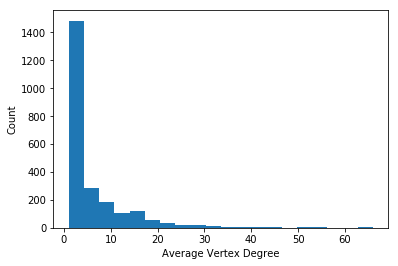

In [49]:
#creating the list of x-values, using  average degree values
x = []
x.append(list(average_degree.values()))

#plotting the histogram
plt.hist(x=x, bins=20, data=filename)
plt.xlabel("Average Vertex Degree")
plt.ylabel("Count")

### 2.2 Comment briefly on the shape of the distribution. In particular, how useful or informative is the average degree in describing this network?

ANSWER: It looks like a power distribution. The average degree (~6 from our previous answer) is not super information; because the graph demonstrates that average has a very high variance to it. Since looking at the graph, a lot of points have a vertex degree of 1, so average vertex degree is probably not the right approach to evaluating a network. 

## Question 3

Let's examine some of the proteins in more detail. We will first build a dictionary from the `yeast_vertices.txt` file, where the keys of the dictionary are node IDs and the values are the corresponding text fields (protein names / descriptions).

In [50]:
#read in the file yeast_vertices.txt and call it 'filename'
filename = "yeast_vertices.txt"
#create an empty dictionary called 'proteins'
proteins = {}
#start a for-loop; for each variable in  the file
for line in open(filename):
#the variable is created by removing all white space, replacing the tab with nothing, 
#and splitting values based on the bar "|" 
    line = line.rstrip().replace("\t","").split("|")
#protein_id is anything in position 0 of the  line (so protein_id = 1,2, 3, etc)
    protein_id = int(line[0])
#values in position two are the protein name
    protein_name = line[1]
#filling in the proteins dictionary, by having the keys be the protein_id and 
#the values be the protein_name
    proteins[protein_id] = protein_name

### 3.1 Add a comment line before each line of code in the above script, explaining briefly what the line does.

### 3.2 Use the `proteins` dictionary to look up the names / descriptions of proteins whose IDs are 15, 80, 200, and 1250.

In [51]:
mykeys = [15, 80, 200, 1250]
[proteins[x] for x in mykeys]

['ADE5,7 phosphoribosylamine-glycine ligase and phosphoribosylformylglycinamidine cyclo-ligase',
 'Unknown protein',
 'SBP1 single-strand nucleic acid binding protein',
 'EBP2 required for pre-rRNA processing and ribosomal subunit assembly']

### 3.3 Some of the proteins are unknown (their biological function is not known at present) and the name / description of these proteins is "Unknown protein" in both the `yeast_vertices.txt` file as well as the `proteins` dictionary. Using the `proteins` dictionary, find out how many proteins have unknown functions.

In [52]:
sum( x == "Unknown protein" for x in proteins.values() )

56